In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the data
Stores = pd.read_csv("C:/Users/Dell/Downloads/archive (4)/Stores.csv")

In [19]:
Stores.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
#Checking for nulls and deleting duplicates
Stores.info()
Stores.drop_duplicates(subset=None, keep='first', inplace=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


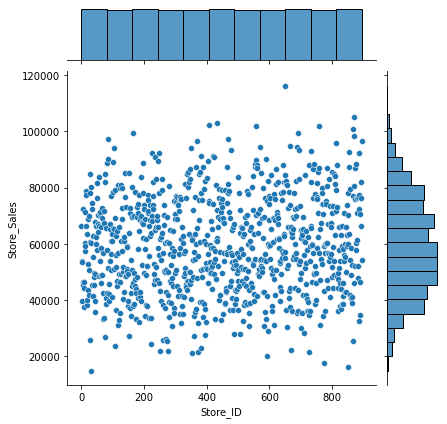

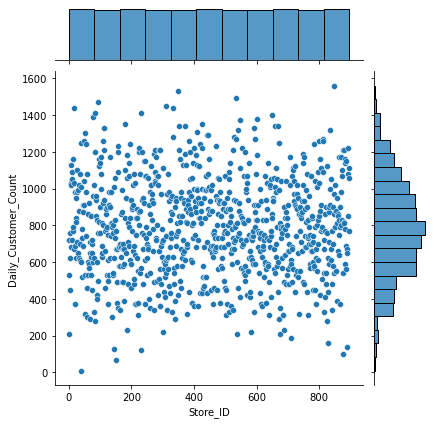

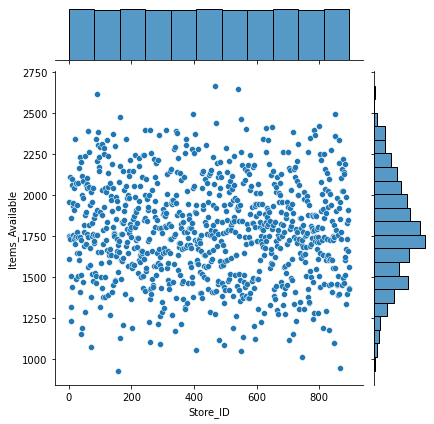

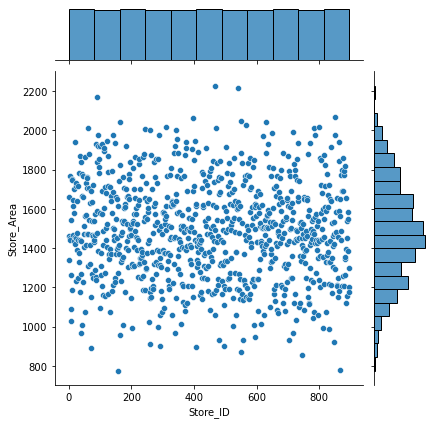

In [5]:
Stores['Store_ID'] = Stores.index
#Checking for outliers through plots especially scatter plots
sns.jointplot(x = 'Store_ID', y = 'Store_Sales', data = Stores)
sns.jointplot(x = 'Store_ID', y = 'Daily_Customer_Count', data = Stores)
sns.jointplot(x = 'Store_ID', y = 'Items_Available', data = Stores)
sns.jointplot(x = 'Store_ID', y = 'Store_Area', data = Stores)

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

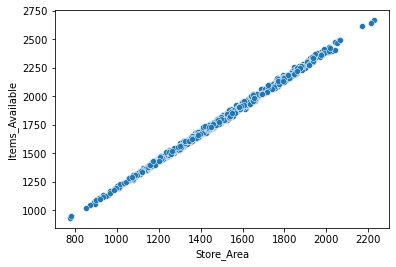

In [54]:
#Analyzing the data through plots.
sns.scatterplot(x = 'Store_Area', y = 'Items_Available', data = Stores)


<AxesSubplot:xlabel='Store_Area', ylabel='Daily_Customer_Count'>

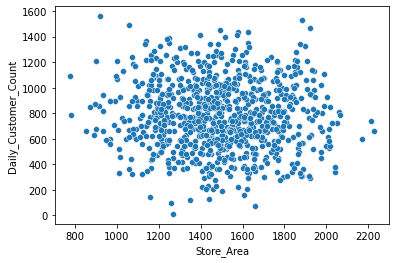

In [55]:
sns.scatterplot(x = 'Store_Area', y = 'Daily_Customer_Count', data = Stores)

<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

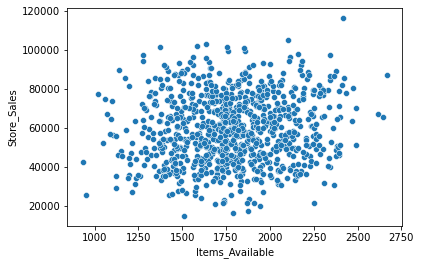

In [56]:
sns.scatterplot(x = 'Items_Available', y = 'Store_Sales', data = Stores)

In [57]:
Stores.corr()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_ID
Store_ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486,1.000000
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474,-0.058705
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849,-0.055707
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629,-0.010029
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000,0.071486
Store_ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486,1.000000


In [7]:
Stores['total_monthly_customers_count'] = Stores['Daily_Customer_Count'] * 30


In [8]:
Stores['avg_customer_spend_day'] = Stores['Store_Sales'] / Stores['Daily_Customer_Count']


In [9]:
Stores['avg_customer_spend_month'] = (Stores['Store_Sales'] / Stores['Daily_Customer_Count']) * 30

In [10]:
Stores['avg_customer_spend_year'] = Stores['avg_customer_spend_month'] * 12

In [11]:
Stores.head()

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_ID,total_monthly_customers_count,avg_customer_spend_day,avg_customer_spend_month,avg_customer_spend_year
0,1,1659,1961,530,66490,0,15900,125.452830,3763.584906,45163.018868
1,2,1461,1752,210,39820,1,6300,189.619048,5688.571429,68262.857143
2,3,1340,1609,720,54010,2,21600,75.013889,2250.416667,27005.000000
3,4,1451,1748,620,53730,3,18600,86.661290,2599.838710,31198.064516
4,5,1770,2111,450,46620,4,13500,103.600000,3108.000000,37296.000000


In [13]:
Stores.sort_values('avg_customer_spend_day', ascending=False)

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_ID,total_monthly_customers_count,avg_customer_spend_day,avg_customer_spend_month,avg_customer_spend_year
39,40,1270,1516,10,45480,39,300,4548.000000,136440.000000,1.637280e+06
151,152,1662,1986,70,63730,151,2100,910.428571,27312.857143,3.277543e+05
876,877,1259,1493,100,88270,876,3000,882.700000,26481.000000,3.177720e+05
887,888,1156,1398,140,92370,887,4200,659.785714,19793.571429,2.375229e+05
230,231,1347,1628,120,72350,230,3600,602.916667,18087.500000,2.170500e+05
...,...,...,...,...,...,...,...,...,...,...
223,224,1318,1606,1200,24410,223,36000,20.341667,610.250000,7.323000e+03
852,853,1477,1790,880,16370,852,26400,18.602273,558.068182,6.696818e+03
670,671,1461,1739,1250,22310,670,37500,17.848000,535.440000,6.425280e+03
372,373,1876,2254,1340,21650,372,40200,16.156716,484.701493,5.816418e+03
